In [1]:
# This will aggregate your data into two-hour intervals (0-2, 2-4, etc.) and give you the count for each interval.
peak_hours_by_2_sql = r"""
SELECT 
    (EXTRACT(HOUR FROM checkin_time)::INTEGER / 2) * 2 AS two_hour_interval,
    COUNT(*) AS count
FROM 
    schema_snow.checkins
GROUP BY 
    two_hour_interval
ORDER BY 
    two_hour_interval;
"""

peak_hours_by_1_sql = r"""
SELECT 
    (EXTRACT(HOUR FROM checkin_time)::INTEGER) AS one_hour_interval,
    COUNT(*) AS count
FROM 
    schema_snow.checkins
GROUP BY 
    one_hour_interval
ORDER BY 
    one_hour_interval DESC;
"""


In [2]:
# load database parameters
import json

with open('../config.json', 'r') as file:
    config = json.load(file)

DB_USER = config['DB_USER']
DB_PASSWORD = config['DB_PASSWORD']
DB_HOST = config['DB_HOST']
DB_PORT = config['DB_PORT']

In [3]:
from sqlalchemy import create_engine

def get_engine(db):
    # Database connection details
    username = DB_USER
    password = DB_PASSWORD
    host = DB_HOST
    port = DB_PORT
    database = db

    # Create a SQLAlchemy engine
    return create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')


In [4]:
from sqlalchemy import text
import pandas as pd

def display_results(engine, sql):
    with engine.connect() as conn:
        result = conn.execute(text(sql))
        columns = result.keys()
        # convert result to a DataFrame
        df = pd.DataFrame(result.fetchall(), columns=columns)
        return df


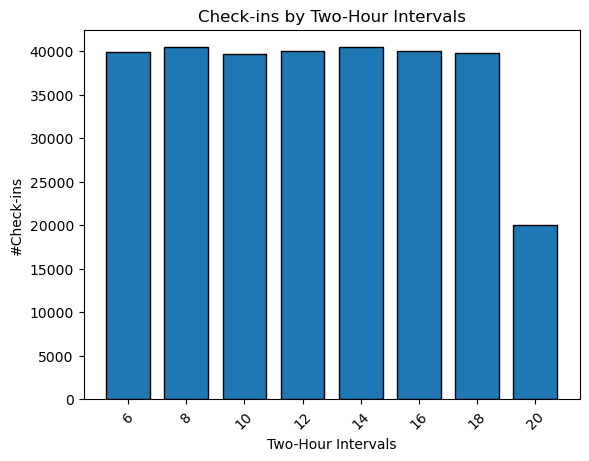

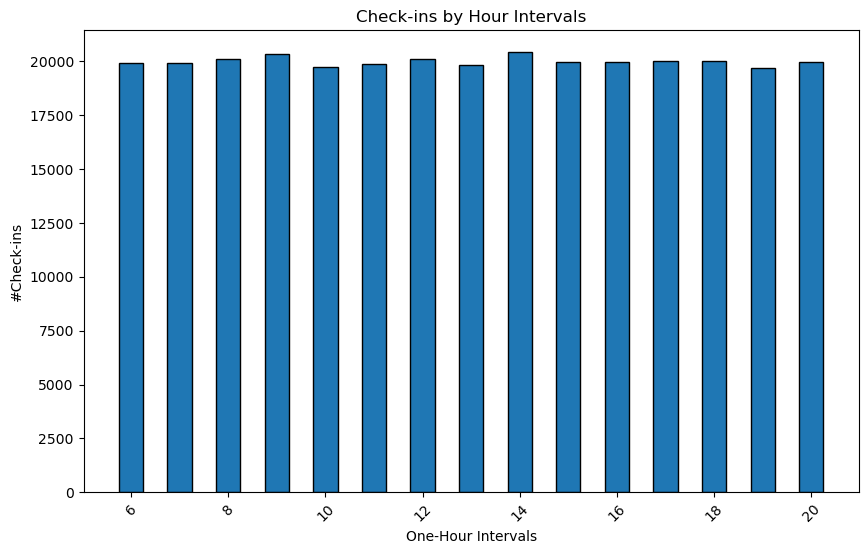

In [5]:
import matplotlib.pyplot as plt

    
# Create a SQLAlchemy engine
engine = get_engine('csv_snow')

df = display_results(engine, peak_hours_by_2_sql)
if not df.empty:
    # Create the bar chart
    plt.bar(df['two_hour_interval'], df['count'], width=1.5, edgecolor='black')
    plt.xlabel('Two-Hour Intervals')
    plt.ylabel('#Check-ins')
    plt.title('Check-ins by Two-Hour Intervals')
    plt.xticks(rotation=45)
    plt.show()


df = display_results(engine, peak_hours_by_1_sql)
if not df.empty:
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df['one_hour_interval'], df['count'], width=.5, edgecolor='black')
    plt.xlabel('One-Hour Intervals')
    plt.ylabel('#Check-ins')
    plt.title('Check-ins by Hour Intervals')
    plt.xticks(rotation=45)
    plt.show()
